In [1]:
#@title Set up Directory { run: "auto"}
import os
from IPython.display import clear_output
from google.colab import drive 
from IPython.display import clear_output
drive.mount('/content/gdrive')
working_directory = 'My Drive/Khairiyah_Bte_Mohamed_Ridhwan/pretrained_rnn' #@param {type:"string"}
wd="/content/gdrive/"+working_directory
os.chdir(wd)

dirpath = os.getcwd()
print("current directory is : " + dirpath)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
current directory is : /content/gdrive/My Drive/Khairiyah_Bte_Mohamed_Ridhwan/pretrained_rnn


In [2]:
import os;
os.getcwd()
os.environ['KERAS_BACKEND'] = 'theano'

import pandas as pd

from emotion_predictor import EmotionPredictor

Using Theano backend.


In [3]:
!pip install -r requirements.txt

In [4]:
# Pandas presentation options
pd.options.display.max_colwidth = 150   # show whole tweet's content
pd.options.display.width = 200          # don't break columns
# pd.options.display.max_columns = 7      # maximal number of columns

# Import tweets dataset

---







In [5]:
tweets = pd.read_csv('tweets_final.csv')
print(tweets.shape)
tweets.head()

(5267, 17)


,Unnamed: 0,Datetime,Tweet.URL,Tweet.Id,Tweet.User.Id,Text,Username,User.Location,replyCount,retweetCount,likeCount,quoteCount,language,retweetedTweet,quotedTweet,mentionedUsers,clean_text
0,1,2020-08-31 22:27:32+00:00,https://twitter.com/VishnoiSays/status/1300560883102281728,1.300561e+18,8.134247e+07,"Canada Buying Doses of Covid-19 Vaccine From Novavax, J&amp;J https://t.co/pUyCwpggX1",VishnoiSays,Singapore,0,0,0,0,en,NaN,NaN,NaN,canada buying doses covid vaccine novavax j amp j
1,2,2020-08-31 22:27:32+00:00,https://twitter.com/VishnoiSays/status/1300560882036924416,1.300561e+18,8.134247e+07,Heat Waves Hurting Cities Most Vulnerable to Covid-19 https://t.co/cebvNELdJ6,VishnoiSays,Singapore,0,0,0,0,en,NaN,NaN,NaN,heat waves hurting cities vulnerable covid
2,3,2020-08-31 16:07:16+00:00,https://twitter.com/onefern/status/1300465185921077249,1.300465e+18,5.447890e+08,One of my fave after dinner snacks nowadays if I'm still peckish during #wfh period\r\n#chickenwings #chickenwing #wings #chicken #snacks #fingerf...,onefern,Singapore,0,0,0,0,en,NaN,NaN,NaN,one fave dinner snacks nowadays m still peckish period
3,4,2020-08-31 14:25:48+00:00,https://twitter.com/sinsica/status/1300439650922708992,1.300440e+18,2.384276e+08,Please be safe guys .. take all precautions and safety measures. \r\n\r\nTry to avoid crowded places and maintain social distancing. #Coronavirus...,sinsica,Singapore,0,0,1,0,en,NaN,NaN,NaN,please safe guys take precautions safety measures try avoid crowded places maintain social distancing
4,5,2020-08-31 11:49:25+00:00,https://twitter.com/heroroxas/status/1300400297693646851,1.300400e+18,1.964754e+09,"Where i'd rather be kasi it's covid-free #tb @ Batanes, Philippines https://t.co/NSiudl2xBu",heroroxas,NaN,0,0,0,0,en,NaN,NaN,NaN,d rather kasi s covid free batanes philippines


In [6]:
date = pd.to_datetime(tweets['Datetime'], format='%Y-%m-%d')
tweets['date'] = date.dt.date

# Convert date to datetime
tweets['date'] = pd.to_datetime(tweets['date'], errors='coerce')

# Add column for month
tweets['month'] = tweets['date'].dt.month

# Add column for week number
tweets['week'] = tweets['date'].apply(lambda x: x.isocalendar()[1])

# Text preprocessing

---







In [7]:
import re

def remove_urls(s):
    # re.sub(pattern,repl,string) is used to replace substrings. Will replace the matches in string with repl
    return re.sub(r'https?://\S+', "", s)

def remove_usernames(s):
    return re.sub(r'@\S+', "", s)

def remove_specialchar(text, remove_digits=False):    
    if not remove_digits:
        pattern = r'[^a-zA-z0-9\s]'
    else:
        pattern = r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

In [8]:
# Get a list of tweets (str)

tweets_list = tweets['Text'].tolist()
tweets_list[:10]

['Canada Buying Doses of Covid-19 Vaccine From Novavax, J&amp;J https://t.co/pUyCwpggX1',
 'Heat Waves Hurting Cities Most Vulnerable to Covid-19 https://t.co/cebvNELdJ6',
 "One of my fave after dinner snacks nowadays if I'm still peckish during #wfh period\r\n#chickenwings #chickenwing #wings #chicken #snacks #fingerfood #barbites #buffalowings\r\n#wfh #covid19 #coronavirus #workfromhome @… https://t.co/Z5UFoi0ejf",
 'Please be safe guys .. take all precautions and safety measures. \r\n\r\nTry to avoid crowded places and maintain social distancing.  #Coronavirus #SafetyFirst #COVID19 https://t.co/gt7Evgcjqd',
 "Where i'd rather be kasi it's covid-free #tb @ Batanes, Philippines https://t.co/NSiudl2xBu",
 '@Infosys_GSTN Hello Team, Any update on the eInvoicing deadline extension from 1–Oct-2020? Due to covid situation companies with more than 500 crore revenue aren’t ready with implementation.',
 "@LukeGromen @profplum99 @GreekFire23 @hendry_hugh @scientificecon Covid helps to plug the

In [9]:
#Text Preprocessing

tweets_list_processed = []
for tweet in tweets_list:
    tweet = remove_urls(tweet)
    tweet = remove_usernames(tweet)
    #tweet = tweet.replace("#", "").replace("_", " ")
    #tweet = remove_specialchar(tweet, remove_digits=False)
    tweets_list_processed.append(tweet)

tweets_list_processed

['Canada Buying Doses of Covid-19 Vaccine From Novavax, J&amp;J ',
 'Heat Waves Hurting Cities Most Vulnerable to Covid-19 ',
 "One of my fave after dinner snacks nowadays if I'm still peckish during #wfh period\r\n#chickenwings #chickenwing #wings #chicken #snacks #fingerfood #barbites #buffalowings\r\n#wfh #covid19 #coronavirus #workfromhome  ",
 'Please be safe guys .. take all precautions and safety measures. \r\n\r\nTry to avoid crowded places and maintain social distancing.  #Coronavirus #SafetyFirst #COVID19 ',
 "Where i'd rather be kasi it's covid-free #tb @ Batanes, Philippines ",
 ' Hello Team, Any update on the eInvoicing deadline extension from 1–Oct-2020? Due to covid situation companies with more than 500 crore revenue aren’t ready with implementation.',
 "     Covid helps to plug the leak via point 1 very effectively.  Don't expect the return of the chinese tourist anytime soon. ",
 '  States can not immunity from shortfall in revenue from Covid caused lockdown',
 ' Ehh,

# Try Ekman's six mood states

In [10]:
!pip install -U Theano

Requirement already up-to-date: Theano in /usr/local/lib/python3.7/dist-packages (1.0.5)


In [11]:
import os
os.getcwd()

'/content/gdrive/My Drive/Khairiyah_Bte_Mohamed_Ridhwan/pretrained_rnn'

In [12]:
# Import model
from keras.models import load_model

model = load_model('models/unison-ekman-mc.h5')
model.summary()

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 143)           0                                            
____________________________________________________________________________________________________
embedding_1 (Embedding)          (None, 143, 25)       10300       input_1[0][0]                    
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 143, 25)       0           embedding_1[0][0]                
____________________________________________________________________________________________________
lstm_1 (LSTM)                    (None, 400)           681600      dropout_1[0][0]                  
___________________________________________________________________________________________

In [13]:
model.get_config()

{'input_layers': [['input_1', 0, 0]],
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 143),
    'input_dtype': 'float32',
    'name': 'input_1',
    'sparse': False},
   'inbound_nodes': [],
   'name': 'input_1'},
  {'class_name': 'Embedding',
   'config': {'W_constraint': None,
    'W_regularizer': None,
    'activity_regularizer': None,
    'batch_input_shape': (None, None),
    'dropout': 0.0,
    'init': 'uniform',
    'input_dim': 412,
    'input_dtype': 'int32',
    'input_length': None,
    'mask_zero': False,
    'name': 'embedding_1',
    'output_dim': 25,
    'trainable': True},
   'inbound_nodes': [[['input_1', 0, 0]]],
   'name': 'embedding_1'},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout_1', 'p': 0.2, 'trainable': True},
   'inbound_nodes': [[['embedding_1', 0, 0]]],
   'name': 'dropout_1'},
  {'class_name': 'LSTM',
   'config': {'U_regularizer': None,
    'W_regularizer': None,
    'activation': 'tanh',
    'b_regularizer'

In [14]:
# Predictor for Ekman's emotions in multiclass setting using unison model (by default, use_unison_model=True)
model = EmotionPredictor(classification='ekman', setting='mc')

In [15]:
predictions = model.predict_classes(tweets_list_processed)

In [16]:
# Not necessary, uncomment only if you are interested
# probabilities = model.predict_probabilities(tweets_list)
# probabilities.head()
# embeddings = model.embed(tweets_list)
# embeddings

In [17]:
ekman_emotion = predictions['Emotion'].tolist()

In [18]:
# Add 'ekman_emotion' column

tweets['ekman_emotion'] = ekman_emotion
tweets.head()
tweets.shape

(5267, 21)

In [19]:
# Get number of tweets for each sentiment

tweets_persentiment = tweets.groupby(['ekman_emotion']).size().reset_index(name='count')
tweets_persentiment

,ekman_emotion,count
0,Anger,172
1,Disgust,84
2,Fear,1591
3,Joy,2352
4,Sadness,326
5,Surprise,742


In [20]:
tweets_persentiment['percentage_of_total'] = tweets_persentiment['count'].apply(lambda x: round(x / tweets.shape[0],2) * 100)
tweets_persentiment = tweets_persentiment.sort_values(by=['percentage_of_total'], ascending=False)
tweets_persentiment

,ekman_emotion,count,percentage_of_total
3,Joy,2352,45.0
2,Fear,1591,30.0
5,Surprise,742,14.0
4,Sadness,326,6.0
0,Anger,172,3.0
1,Disgust,84,2.0


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


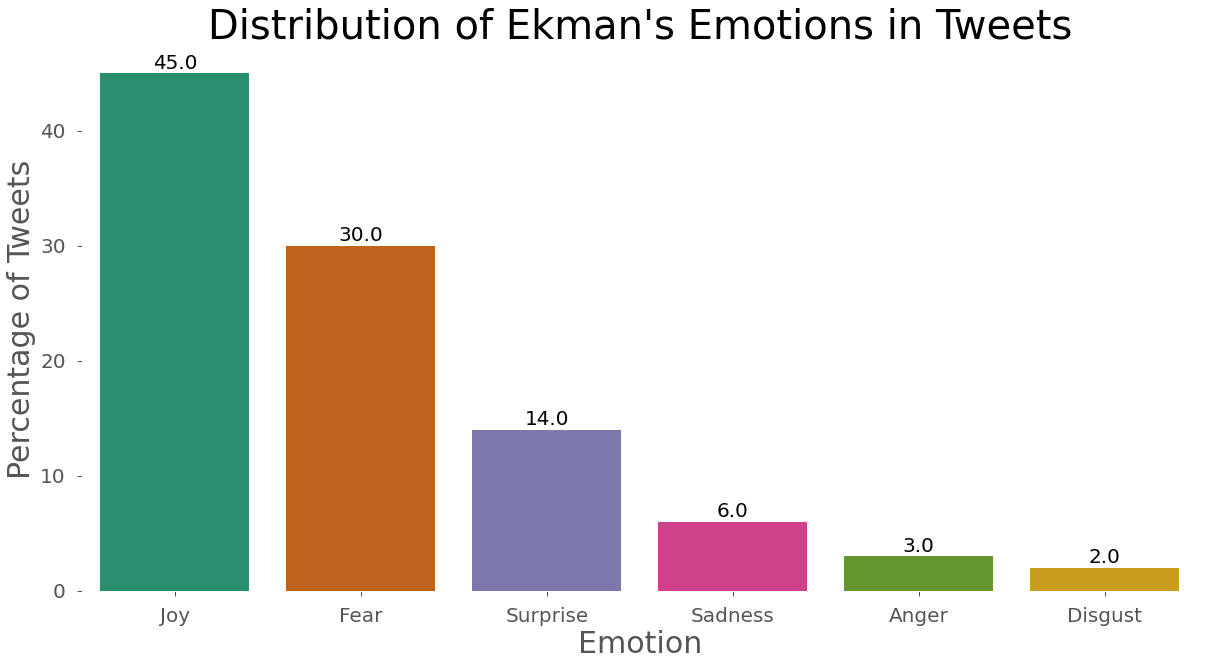

In [21]:
# Visualise percentage of posts with each sentiment
import seaborn as sns
import matplotlib.style as style
import matplotlib
import matplotlib.pyplot as plt

#### Plot settings ####
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')
matplotlib.rcParams['font.family'] = "Arial"
matplotlib.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = [20, 10]
sns.set_context('paper')
####

ax = sns.barplot(x="ekman_emotion",
                 y="percentage_of_total",
                 data=tweets_persentiment,
                 palette=("Dark2")
                )

#choose from these colour palettes
# 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r',

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', size=20 )

ax.axes.set_title("Distribution of Ekman's Emotions in Tweets",fontsize=40)
ax.set_xlabel("Emotion",fontsize=30)
ax.set_ylabel('Percentage of Tweets',fontsize=30)
ax.tick_params(labelsize=20)
ax.set_facecolor('w')


In [22]:
fear_tweets = tweets[tweets.ekman_emotion == "Fear"]
fear_tweets.head()

,Unnamed: 0,Datetime,Tweet.URL,Tweet.Id,Tweet.User.Id,Text,Username,User.Location,replyCount,retweetCount,likeCount,quoteCount,language,retweetedTweet,quotedTweet,mentionedUsers,clean_text,date,month,week,ekman_emotion
5,6,2020-08-31 11:16:42+00:00,https://twitter.com/vipultyagig/status/1300392064207581184,1.300392e+18,3.707335e+08,"@Infosys_GSTN Hello Team, Any update on the eInvoicing deadline extension from 1–Oct-2020? Due to covid situation companies with more than 500 cro...",vipultyagig,Singapore,0,0,0,0,en,NaN,NaN,"[User(username='Infosys_GSTN', displayname='GST Tech', id=869060106893144065, description=None, rawDescription=None, descriptionUrls=None, verifie...",hello team update einvoicing deadline extension oct due covid situation companies crore revenue arent ready implementation,2020-08-31,8,36,Fear
7,8,2020-08-31 05:20:53+00:00,https://twitter.com/AshokSi22240633/status/1300302519701131264,1.300303e+18,1.208896e+18,@Kaalateetham @bhupendrachaube States can not immunity from shortfall in revenue from Covid caused lockdown,AshokSi22240633,NaN,0,0,0,0,en,NaN,NaN,"[User(username='Kaalateetham', displayname='DR JAGADISH J HIREMATH', id=68636682, description=None, rawDescription=None, descriptionUrls=None, ver...",states can immunity shortfall revenue covid caused lockdown,2020-08-31,8,36,Fear
13,14,2020-08-30 08:50:25+00:00,https://twitter.com/DonaldDistant/status/1299992861643923457,1.299993e+18,1.371241e+09,"India records world's highest single-day rise with more than 78,700 new COVID-19 cases https://t.co/pR7DlKifoD we’d",DonaldDistant,Singapore,0,0,0,0,en,NaN,NaN,NaN,india records world s highest single day rise new covid cases,2020-08-30,8,35,Fear
20,21,2020-08-29 10:05:44+00:00,https://twitter.com/alvinjhchang/status/1299649427536183296,1.299649e+18,6.397696e+07,"180,000 dead out of 330 mil Americans - the odds of dying from Covid-19 in the US is therefore ~ 1 in 1,800 nationwide. \r\n\r\nThe odds of dying ...",alvinjhchang,SGMY,0,0,0,0,en,NaN,NaN,NaN,dead mil americans odds dying covid us therefore nationwide odds dying fall car accident accidental drowning wonder hitting home,2020-08-29,8,35,Fear
24,25,2020-08-29 02:05:42+00:00,https://twitter.com/SwajayaN/status/1299528623326728192,1.299529e+18,2.947666e+09,Wish to thank #TemasekFoundation for their donations to some essential institutions to address Pandemic Covid-19 as part of on-going collaboration...,SwajayaN,RI SING 50,0,0,1,0,en,NaN,NaN,"[User(username='kbri', displayname='otmaiin', id=849298494, description=None, rawDescription=None, descriptionUrls=None, verified=None, created=No...",wish thank donations essential institutions address pandemic covid part going collaboration singapura appreciation temasek,2020-08-29,8,35,Fear


## Export results as CSV (if you want)

In [23]:
#Run only if you want to save the results
#tweets.to_csv('data_ekman.csv', sep=',', index = False)

## Load results from CSV

In [24]:
#import saved results from previous run
# tweets = pd.read_csv('data_ekman.csv', index_col=0)
# print(tweets.shape)
# tweets.head()

# Plot frequency of emotions over time

In [25]:
# Get the frequency of tweet with each emotions weekly

import plotly.express as px
import datetime

no_of_tweets_perday = tweets.groupby(['ekman_emotion','week']).size().reset_index(name='counts')
no_of_tweets_perday

fig = px.line(no_of_tweets_perday, x="week", y="counts", color='ekman_emotion', title="Frequency of tweet with each Ekman's emotions per week")
fig.for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))
fig.update_layout(
    xaxis_title="Week number of 2020",
    yaxis_title="Tweet counts",
    font=dict(size=14
    )
)
fig.update_yaxes(showgrid=False)
fig.update_xaxes(showgrid=False)

fig.update_layout(shapes=[
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= 6, x1= 6,line=dict(
        color="Black",
        width=1.2,
        dash="dot",
    )
    ),
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= 12, x1= 12,line=dict(
        color="Black",
        width=1.2,
        dash="dot",
    )
    ),
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= 15, x1= 15,line=dict(
        color="Black",
        width=1.2,
        dash="dot",
    )
    )])


fig.add_annotation(
     x=6,
        y=0.98,
        xref="x",
        yref="paper",
        text="[A]"
        )

fig.add_annotation(
     x=12,
        y=0.98,
        xref="x",
        yref="paper",
        text="[B]"
        )

fig.add_annotation(
     x=15,
        y=0.98,
        xref="x",
        yref="paper",
        text="[C]"
        )



fig.show()

# !pip install plotly>=4.0.0
# !wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
# !chmod +x /usr/local/bin/orca
# !apt-get install xvfb libgtk2.0-0 libgconf-2-4
# fig.write_image("ekman_weekly.png")

In [26]:
tweets[(tweets["ekman_emotion"] == "Fear") & (tweets["week"] == 6)].head()

,Unnamed: 0,Datetime,Tweet.URL,Tweet.Id,Tweet.User.Id,Text,Username,User.Location,replyCount,retweetCount,likeCount,quoteCount,language,retweetedTweet,quotedTweet,mentionedUsers,clean_text,date,month,week,ekman_emotion
5014,5015,2020-02-09 15:08:35+00:00,https://twitter.com/1mpzz/status/1226523291856195584,1.226523e+18,6.335153e+08,Oh no! It’s getting too close for comfort. #WuhanCoronavirus #singapore #sg,1mpzz,In a pressure cooker,0,0,0,0,en,NaN,NaN,NaN,oh getting close comfort,2020-02-09,2,6,Fear
5017,5018,2020-02-09 13:00:11+00:00,https://twitter.com/imnitinschauhan/status/1226490978611019779,1.226491e+18,2.621294e+09,This is what happening when we are scared 😟 \r\n#coronavirussingapore\r\n#coronavirus \r\n#Coronavirusourtbreak \r\n#stayclam \r\n#China \r\n#Chin...,imnitinschauhan,Singapore,0,0,2,0,en,NaN,NaN,NaN,happening scared,2020-02-09,2,6,Fear
5019,5020,2020-02-09 11:15:53+00:00,https://twitter.com/imnitinschauhan/status/1226464731348684801,1.226465e+18,2.621294e+09,Truth or lies?\r\n\r\n#coronavirussingapore\r\n#coronavirus \r\n#Coronavirusourtbreak \r\n#stayclam \r\n#China \r\n#ChinaVirus \r\n#ChinaWuHan \r\...,imnitinschauhan,Singapore,31,43,51,10,en,NaN,NaN,NaN,truth lies,2020-02-09,2,6,Fear
5023,5024,2020-02-09 08:05:29+00:00,https://twitter.com/fauzehhhhh1/status/1226416818182598656,1.226417e+18,1.060113e+18,"wuhan wont kill u, but large amount of maggie will",fauzehhhhh1,NaN,0,3,10,0,en,NaN,NaN,NaN,wuhan wont kill u large amount maggie,2020-02-09,2,6,Fear
5024,5025,2020-02-09 07:42:01+00:00,https://twitter.com/YumiChoong/status/1226410910907977728,1.226411e+18,4.386939e+09,The only instant noodles left untouched in Singapore 😂\r\n#Singapore #coronavirussingapore #Coronavius #WuhanCoronavirus https://t.co/4aBaNBD2Wx,YumiChoong,NaN,0,0,1,0,en,NaN,NaN,NaN,instant noodles left untouched singapore,2020-02-09,2,6,Fear


In [27]:
tweets[(tweets["ekman_emotion"] == "Fear") & (tweets["week"] == 12)].head()

,Unnamed: 0,Datetime,Tweet.URL,Tweet.Id,Tweet.User.Id,Text,Username,User.Location,replyCount,retweetCount,likeCount,quoteCount,language,retweetedTweet,quotedTweet,mentionedUsers,clean_text,date,month,week,ekman_emotion
3658,3659,2020-03-22 23:26:59+00:00,https://twitter.com/rosse_tdl/status/1241869011220127744,1.241869e+18,9.510040e+17,#covid_19 #22ndmarch2020 #singapore update by #thegovernment .. 😅🤗\r\n.\r\n\r\n#coronavirusoutbreak⚠️ \r\n#covıd19 \r\n#coronaviruspandemic \r\n#s...,rosse_tdl,NaN,0,0,0,0,en,NaN,NaN,NaN,update d,2020-03-22,3,12,Fear
3659,3660,2020-03-22 23:06:39+00:00,https://twitter.com/safidoncity/status/1241863893477019649,1.241864e+18,4.506867e+07,Anybody keeping a ‘global COVID leadership table’ for the national leaders?\r\nI wouldn’t like to believe the authoritarians did it better than th...,safidoncity,Singapore,0,0,0,0,en,NaN,https://twitter.com/hofrench/status/1241862571034107904,NaN,anybody keeping global covid leadership table national leaders wouldnt like believe authoritarians better democracies table help,2020-03-22,3,12,Fear
3660,3661,2020-03-22 22:50:40+00:00,https://twitter.com/dan_murphy/status/1241859872771244033,1.241860e+18,2.754728e+07,#NOW: Republican #Coronavirus Rescue Bill fails in senate vote - negotiations continuing. Equity Futures are limit down. @CNBCi,dan_murphy,United Arab Emirates,0,0,0,0,en,NaN,NaN,"[User(username='CNBCi', displayname='CNBC International', id=19898168, description=None, rawDescription=None, descriptionUrls=None, verified=None,...",republican rescue bill fails senate vote negotiations continuing equity futures limit,2020-03-22,3,12,Fear
3661,3662,2020-03-22 22:49:20+00:00,https://twitter.com/dan_murphy/status/1241859533942796289,1.241860e+18,2.754728e+07,#BREAKING: #UAE suspends all passenger and transit flights to and from the country for two weeks to curb the spread of #coronavirus @CNBCi,dan_murphy,United Arab Emirates,0,0,1,0,en,NaN,NaN,"[User(username='CNBCi', displayname='CNBC International', id=19898168, description=None, rawDescription=None, descriptionUrls=None, verified=None,...",suspends passenger transit flights country two weeks curb spread,2020-03-22,3,12,Fear
3662,3663,2020-03-22 22:40:01+00:00,https://twitter.com/HeartBali/status/1241857192656924672,1.241857e+18,2.427034e+08,"Let's fight the virus!\r\n""Master Lee"" limited edition resin sculptures height:38 cm. Contact us for more information.\r\nig @heartlabbali \r\n#co...",HeartBali,Bali,0,0,0,0,en,NaN,NaN,NaN,let s fight virus master lee limited edition resin sculptures height cm contact us information ig,2020-03-22,3,12,Fear


In [28]:
tweets[(tweets["ekman_emotion"] == "Joy") & (tweets["week"] == 15)].head()

,Unnamed: 0,Datetime,Tweet.URL,Tweet.Id,Tweet.User.Id,Text,Username,User.Location,replyCount,retweetCount,likeCount,quoteCount,language,retweetedTweet,quotedTweet,mentionedUsers,clean_text,date,month,week,ekman_emotion
2478,2479,2020-04-12 17:45:52+00:00,https://twitter.com/DroChavez/status/1249393310692560896,1.249393e+18,3.157260e+09,"[ASEAN] COVID-19\r\nTotal Confirmed Cases\r\n13 Apr 2020 12:35am\r\n\r\n#34 🇲🇾 Malaysia: 4,683\r\n#35 🇵🇭 Philippines: 4,648\r\n#37 🇮🇩 Indonesia: 4...",DroChavez,Singapore,0,0,1,0,en,NaN,NaN,NaN,asean covid total confirmed cases apr malaysia philippines indonesia thailand singapore vietnam brunei cambodia myanmar laos,2020-04-12,4,15,Joy
2480,2481,2020-04-12 16:28:02+00:00,https://twitter.com/basilyeo/status/1249373724744110081,1.249374e+18,3.863758e+07,"Going back to the office to mop the floor, make sure nobody’s stolen our gear and grab my guitars home tomorrow... please stay away from me corona...",basilyeo,"Bedok, Singapore",1,0,2,0,en,NaN,NaN,NaN,going back office mop floor make sure nobodys stolen gear grab guitars home tomorrow please stay away coronavirus,2020-04-12,4,15,Joy
2481,2482,2020-04-12 16:18:19+00:00,https://twitter.com/iamhamidHD/status/1249371279007698958,1.249371e+18,1.716110e+08,"With everyone being quarantined due to Covid-19, I thought to make up something educational with my name.. \r\nIf you follow #HAMID, the steps abo...",iamhamidHD,"Lucknow, INDIA",0,0,0,0,en,NaN,NaN,"[User(username='MoHFW_INDIA', displayname='Ministry of Health', id=2596143056, description=None, rawDescription=None, descriptionUrls=None, verifi...",everyone quarantined due covid thought make something educational name follow steps can keep well safe lets stand together hard time humans,2020-04-12,4,15,Joy
2488,2489,2020-04-12 14:19:46+00:00,https://twitter.com/BinxBugarin/status/1249341441928654848,1.249341e+18,1.746333e+08,[FULL TEXT] Pope Francis' Easter message in the time of COVID-19 https://t.co/i142kprlnT,BinxBugarin,Singapore,0,0,0,0,en,NaN,NaN,NaN,full text pope francis easter message time covid,2020-04-12,4,15,Joy
2489,2490,2020-04-12 13:55:02+00:00,https://twitter.com/bernardlim108/status/1249335221243260934,1.249335e+18,2.378489e+09,"ขนมกุยช่าย chives-filling kueh, made in Singapore by Thai chefs locally through @pimster024 the killer sauce made it a great treat especially duri...",bernardlim108,Singapore,0,0,0,0,en,NaN,NaN,NaN,chives filling kueh made singapore thai chefs locally killer sauce made great treat especially circuit breaker days,2020-04-12,4,15,Joy


In [29]:
tweets[(tweets["ekman_emotion"] == "Surprise") & (tweets["week"] == 12)].head()

,Unnamed: 0,Datetime,Tweet.URL,Tweet.Id,Tweet.User.Id,Text,Username,User.Location,replyCount,retweetCount,likeCount,quoteCount,language,retweetedTweet,quotedTweet,mentionedUsers,clean_text,date,month,week,ekman_emotion
3665,3666,2020-03-22 19:27:19+00:00,https://twitter.com/_rodahidup/status/1241808694985146368,1.241809e+18,1.453991e+09,"23 new COVID-19 cases in Singapore, including 18 imported infections https://t.co/akqrqfv6P5",_rodahidup,Johor Bahru Johor Malaysia,0,0,0,0,en,NaN,NaN,NaN,new covid cases singapore including imported infections,2020-03-22,3,12,Surprise
3678,3679,2020-03-22 13:12:55+00:00,https://twitter.com/simonkearney/status/1241714473519296513,1.241714e+18,1.988637e+07,"18 new imported cases, 5 new local cases. Latest singapore government covid-19 update. https://t.co/3KWWrUKAq6",simonkearney,Singapore,0,0,1,0,en,NaN,NaN,NaN,new imported cases new local cases latest singapore government covid update,2020-03-22,3,12,Surprise
3682,3683,2020-03-22 11:54:25+00:00,https://twitter.com/KapilKothari/status/1241694720897609728,1.241695e+18,7.713002e+07,#Covid_19india #ThaliBajao #5baje5minute #clapforourcarers \r\n\r\nSupport from Singapore for our heroes @narendramodi https://t.co/lFKmxb51vQ,KapilKothari,"Maharashtra, India",0,0,4,0,en,NaN,NaN,"[User(username='narendramodi', displayname='Narendra Modi', id=18839785, description=None, rawDescription=None, descriptionUrls=None, verified=Non...",support singapore heroes,2020-03-22,3,12,Surprise
3687,3688,2020-03-22 11:22:24+00:00,https://twitter.com/benjiminu/status/1241686662394122241,1.241687e+18,5.907478e+07,"Not really surprised Japan was able to suppress the virus spread, having a culture of wearing mask, sanitizer and extreme (mental) social distanci...",benjiminu,Singapore,0,0,0,0,en,NaN,NaN,NaN,really surprised japan able suppress virus spread culture wearing mask sanitizer extreme mental social distancing norm paying coronavirus explosio...,2020-03-22,3,12,Surprise
3692,3693,2020-03-22 10:25:03+00:00,https://twitter.com/jyooks/status/1241672228854321152,1.241672e+18,3.500876e+08,"Community nurses pay home visits, use teleconferencing amid COVID-19 outbreak | Video https://t.co/hnEAQRIh8k",jyooks,singapore,0,0,1,0,en,NaN,NaN,NaN,community nurses pay home visits use teleconferencing amid covid outbreak video,2020-03-22,3,12,Surprise


In [30]:
tweets[(tweets["ekman_emotion"] == "Surprise") & (tweets["week"] == 15)].head()

,Unnamed: 0,Datetime,Tweet.URL,Tweet.Id,Tweet.User.Id,Text,Username,User.Location,replyCount,retweetCount,likeCount,quoteCount,language,retweetedTweet,quotedTweet,mentionedUsers,clean_text,date,month,week,ekman_emotion
2472,2473,2020-04-12 23:49:26+00:00,https://twitter.com/pezer69/status/1249484805210804225,1.249485e+18,4.089207e+07,It’s Monday! #circuitbreaker #circuitbreakersg #cbsg #gwg1000 #gwg1000gb #internationalgshockcollectors #igsc #igc #thewrongwrist #gshocksg #gshoc...,pezer69,Singapore,0,0,0,0,en,NaN,NaN,NaN,monday,2020-04-12,4,15,Surprise
2473,2474,2020-04-12 23:47:32+00:00,https://twitter.com/krisaizayvette/status/1249484326997123072,1.249484e+18,5.669947e+08,covid ward! 1st day!,krisaizayvette,Singapore,0,0,0,0,en,NaN,NaN,NaN,covid ward day,2020-04-12,4,15,Surprise
2479,2480,2020-04-12 16:36:03+00:00,https://twitter.com/LaverniaL/status/1249375741667463168,1.249376e+18,4.986251e+08,76 Days left 💍...... Covid-19 please don’t spoil anything further,LaverniaL,Ang Mo Kio,2,0,2,0,en,NaN,NaN,NaN,days left covid please dont spoil anything,2020-04-12,4,15,Surprise
2483,2484,2020-04-12 16:01:00+00:00,https://twitter.com/idkzave/status/1249366918554779653,1.249367e+18,2.671787e+09,the movie contagion shows alot about the virus and its pandemic. Its almost predicted the coronavirus,idkzave,Teo Heng KTV,0,0,0,0,en,NaN,NaN,NaN,movie contagion shows alot virus pandemic almost predicted coronavirus,2020-04-12,4,15,Surprise
2486,2487,2020-04-12 14:51:07+00:00,https://twitter.com/su53n/status/1249349334857994241,1.249349e+18,2.310495e+08,"Looking at the current situation of Covid-19, the plan I had to see you in India 🇮🇳 in August may or may not happen. I’ll just take it as you have...",su53n,SG 🇸🇬 | IG su53n,1,5,58,0,en,NaN,NaN,NaN,looking current situation covid plan see india august may may happen ill just take something bigger,2020-04-12,4,15,Surprise


# Forming tokens for wordcloud formation
What is contributing to each emotion? Visualize with wordclouds


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import gensim
import re
import nltk
from tqdm import tqdm

from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()

# Import customs module to tokenize and clean tweet dataset
from clean_tokenizer import tokenize_tweets, clean_tweet

In [32]:
import nltk
nltk.download('wordnet')
# Convert cleaned tweet into tokens list
tweets['Text']=tweets['Text'].apply(str)
tweets['Text'] = tweets['Text'].replace({'govt':'government', 'Govt':'Government'} )
tweets['clean_text_new']=tweets['Text'].apply(clean_tweet, bigrams=True)
tweets.head()
tweets['clean_tokens'] = tweets.clean_text_new.apply(lambda x: re.split('\s', x))
#remove additional custom stopwords
stop = ["pm","t.co","http","https","amp","t","t.c","c","rt", "pl", "sg","singapore", "covid-19","coronavirus", "covid",
        "covid19","wuhan", "s", "p", "like", "im","new", "day", "days","year", "ur", "ve", "la", "ive", "cos", "guys",
        "didnt", "time", "people", "dont", "today", "thing", "week", "months", "post","yesterday", "man", "wont", "uk",
        "st", "lets", "don", "feel", "feeling", "gonna","isnt", "pls", "share", "wait", "wanna", "na", "back", "means",
        "fuck", "fucking", "lah", "good","due", "sa", "ingat", "sa covid", "just", "will", "can", "now", "get", "go", "us",
        "can", "one", "even", "just", "ada", "ke", "got", "going", "last", "etc", "kaypo", "still", "chibai", "woodlands",
        "singapore", "woodlands_singapore", "say", "know", "virus","situation", "need", "want", "take", "come", "look",
        "think", 'actually', 'especially', 'later', 'guess', 'note', 'dear', 'road', 'start', 'stop', 'things', 'give',
        'try', 'tell', 'shit', 'maybe', 'keep', 'right','time', 'march_march', 'stacy',  'time_coronavirus', 'amid_covid', 
        'ingat_covid', 'iwas','mall','bedok', 'control', 'lawrence', 'wong', 'lawrence_wong', 'feel_like']
        
tweets['clean_tokens_final']= tweets['clean_tokens'].apply(lambda x: [item for item in x if item not in stop])
tweets.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,Unnamed: 0,Datetime,Tweet.URL,Tweet.Id,Tweet.User.Id,Text,Username,User.Location,replyCount,retweetCount,likeCount,quoteCount,language,retweetedTweet,quotedTweet,mentionedUsers,clean_text,date,month,week,ekman_emotion,clean_text_new,clean_tokens,clean_tokens_final
0,1,2020-08-31 22:27:32+00:00,https://twitter.com/VishnoiSays/status/1300560883102281728,1.300561e+18,8.134247e+07,"Canada Buying Doses of Covid-19 Vaccine From Novavax, J&amp;J https://t.co/pUyCwpggX1",VishnoiSays,Singapore,0,0,0,0,en,NaN,NaN,NaN,canada buying doses covid vaccine novavax j amp j,2020-08-31,8,36,Joy,canada buy dose covid vaccine novavax canada_buy buy_dose dose_covid covid_vaccine vaccine_novavax,"[canada, buy, dose, covid, vaccine, novavax, canada_buy, buy_dose, dose_covid, covid_vaccine, vaccine_novavax]","[canada, buy, dose, vaccine, novavax, canada_buy, buy_dose, dose_covid, covid_vaccine, vaccine_novavax]"
1,2,2020-08-31 22:27:32+00:00,https://twitter.com/VishnoiSays/status/1300560882036924416,1.300561e+18,8.134247e+07,Heat Waves Hurting Cities Most Vulnerable to Covid-19 https://t.co/cebvNELdJ6,VishnoiSays,Singapore,0,0,0,0,en,NaN,NaN,NaN,heat waves hurting cities vulnerable covid,2020-08-31,8,36,Joy,heat wave hurt cities vulnerable covid heat_wave wave_hurt hurt_cities cities_vulnerable vulnerable_covid,"[heat, wave, hurt, cities, vulnerable, covid, heat_wave, wave_hurt, hurt_cities, cities_vulnerable, vulnerable_covid]","[heat, wave, hurt, cities, vulnerable, heat_wave, wave_hurt, hurt_cities, cities_vulnerable, vulnerable_covid]"
2,3,2020-08-31 16:07:16+00:00,https://twitter.com/onefern/status/1300465185921077249,1.300465e+18,5.447890e+08,One of my fave after dinner snacks nowadays if I'm still peckish during #wfh period\r\n#chickenwings #chickenwing #wings #chicken #snacks #fingerf...,onefern,Singapore,0,0,0,0,en,NaN,NaN,NaN,one fave dinner snacks nowadays m still peckish period,2020-08-31,8,36,Joy,fave dinner snack nowadays peckish period fave_dinner dinner_snack snack_nowadays nowadays_peckish peckish_period,"[fave, dinner, snack, nowadays, peckish, period, fave_dinner, dinner_snack, snack_nowadays, nowadays_peckish, peckish_period]","[fave, dinner, snack, nowadays, peckish, period, fave_dinner, dinner_snack, snack_nowadays, nowadays_peckish, peckish_period]"
3,4,2020-08-31 14:25:48+00:00,https://twitter.com/sinsica/status/1300439650922708992,1.300440e+18,2.384276e+08,Please be safe guys .. take all precautions and safety measures. \r\n\r\nTry to avoid crowded places and maintain social distancing. #Coronavirus...,sinsica,Singapore,0,0,1,0,en,NaN,NaN,NaN,please safe guys take precautions safety measures try avoid crowded places maintain social distancing,2020-08-31,8,36,Joy,safe guy precautions safety measure avoid crowd place maintain social distance safe_guy guy_precautions precautions_safety safety_measure measure_...,"[safe, guy, precautions, safety, measure, avoid, crowd, place, maintain, social, distance, safe_guy, guy_precautions, precautions_safety, safety_m...","[safe, guy, precautions, safety, measure, avoid, crowd, place, maintain, social, distance, safe_guy, guy_precautions, precautions_safety, safety_m..."
4,5,2020-08-31 11:49:25+00:00,https://twitter.com/heroroxas/status/1300400297693646851,1.300400e+18,1.964754e+09,"Where i'd rather be kasi it's covid-free #tb @ Batanes, Philippines https://t.co/NSiudl2xBu",heroroxas,NaN,0,0,0,0,en,NaN,NaN,NaN,d rather kasi s covid free batanes philippines,2020-08-31,8,36,Joy,kasi covid free batanes philippines kasi_covid covid_free free_batanes batanes_philippines,"[kasi, covid, free, batanes, philippines, kasi_covid, covid_free, free_batanes, batanes_philippines]","[kasi, free, batanes, philippines, kasi_covid, covid_free, free_batanes, batanes_philippines]"


In [33]:
all_words = [word for item in list(tweets['clean_tokens_final']) for word in item]

#frequency distribution from all words
fdist = nltk.FreqDist(all_words)

len(fdist)

48057

In [34]:
fdist = pd.DataFrame.from_dict(fdist, orient='index').reset_index()
fdist.columns = ['word', 'freq']
fdist = fdist.sort_values('freq', ascending=False)

In [35]:
#discard words with <= 1 character
fdist = fdist[fdist.apply(lambda r: len(r['word']) > 1, axis=1)]

#discard numbers
fdist = fdist[fdist.apply(lambda r: r['word'].isdigit() == False, axis=1)]

#retain words that have a frequenct of at least 10
fdist = fdist[(fdist.freq >= 10) & (fdist.freq <= 30000)]
len(fdist)

1028

In [36]:
#dictionary to map order of words
dict_word = {}
for i in range(len(fdist)):
    temp = fdist.iloc[i]
    word = temp['word']
    dict_word[word] = word


#mapping
tweets['cleaned'] = tweets.apply(lambda row: [dict_word[x] for x in row.clean_tokens_final if x in dict_word.keys() ], axis=1)
#remove stopwords
tweets['cleaned'] = tweets.apply(lambda row: [x for x in row.cleaned if x not in stop], axis=1)

In [37]:
#word cloud
!pip install stylecloud
import stylecloud
from PIL import Image


tweets['cleaned_text'] = tweets['cleaned'].apply(lambda x: ' '.join(x))

     |████████████████████████████████| 266kB 3.8MB/s 
     |████████████████████████████████| 163kB 7.3MB/s 
     |████████████████████████████████| 92kB 5.4MB/s 
     |████████████████████████████████| 92kB 5.3MB/s 
  Created wheel for stylecloud: filename=stylecloud-0.5.1-cp37-none-any.whl size=259507 sha256=6b1d6a23637f3d9d6eb26e2d0f5397dcfcfffe02db2729c3776d2a07af73f73c
  Stored in directory: /root/.cache/pip/wheels/fb/19/e2/5e95c310c5a86586048ced770f35e60a8221be7ef0138f61ca
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115928 sha256=8a45bd89ee80839a45cea17897f98db2e95bced6a48d9f445336196247462dbb
  Stored in directory: /root/.cache/pip/wheels/af/19/30/1ea0cad502dcb4e66ed5a690279628c827aea38bbbab75d5ed
  Created wheel for tinycss: filename=tinycss-0.4-cp37-none-any.whl size=43942 sha256=e2a5703119d967e850bf6dd0851521557e65401e3640a40ba424201c54ca0b91
  Stored in directory: /root/.cache/pip/wheels/1b/26/08/7390b2e6d5eb3403ef35647f09576459ca567d00ac725307d5

### Word cloud for PEAK OF FEAR IN WEEK 6

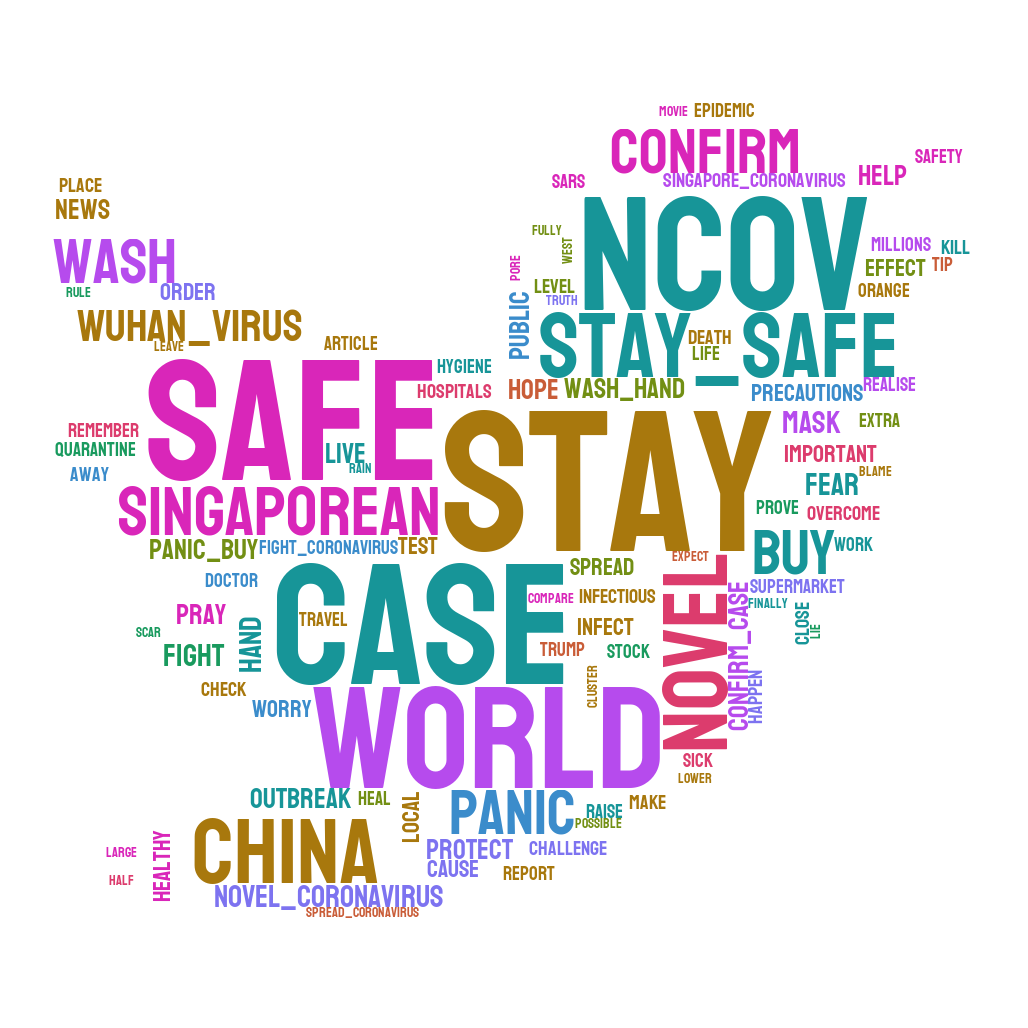

In [38]:
long_string = ','.join(list(tweets[(tweets["ekman_emotion"] == "Fear") & (tweets["week"] == 6)].cleaned_text.values))
stylecloud.gen_stylecloud(text=long_string, icon_name='fab fa-twitter', max_words=100, palette='cmocean.sequential.Phase_11', output_name='twitter-fear-week6.png', size = 1028, collocations=False)
Image.open('twitter-fear-week6.png')

### Word cloud for PEAK OF FEAR IN WEEK 12

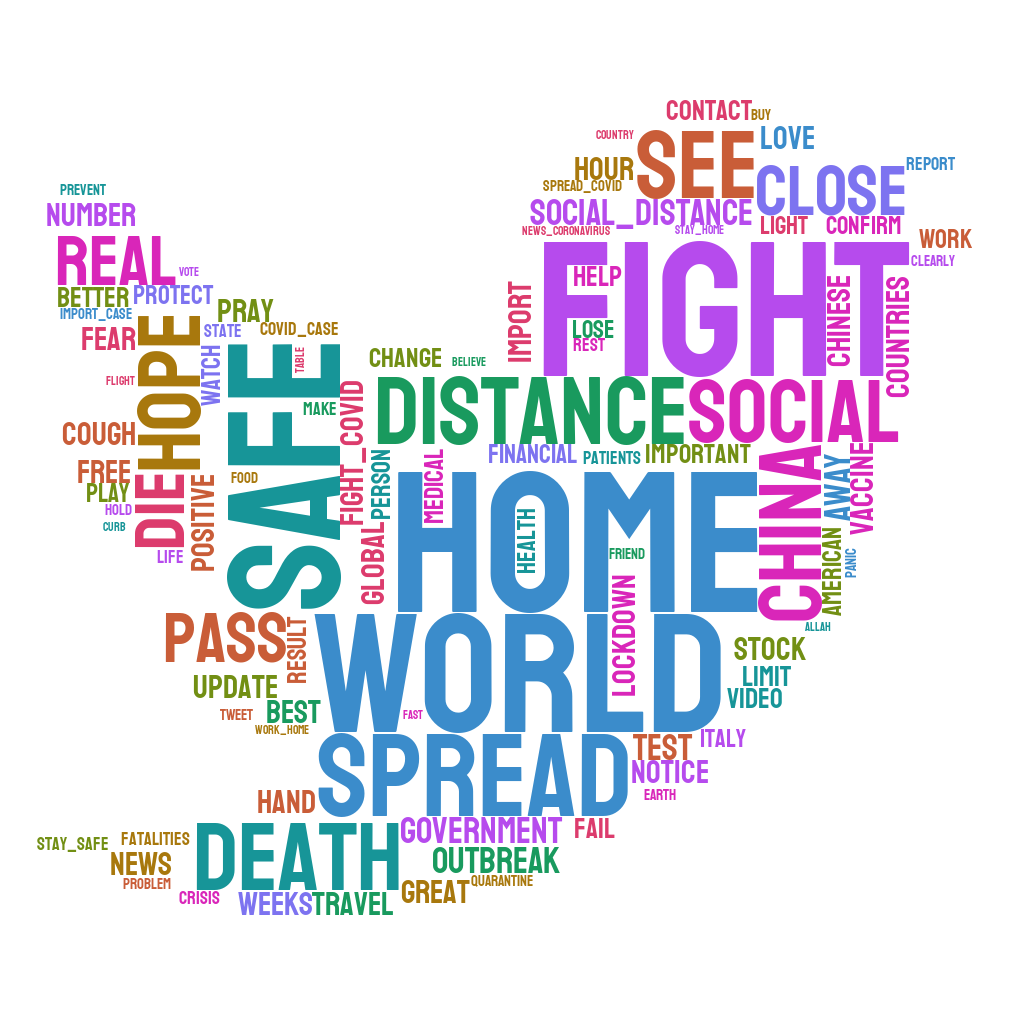

In [39]:
long_string = ','.join(list(tweets[(tweets["ekman_emotion"] == "Fear") & (tweets["week"] == 12)].cleaned_text.values))
stylecloud.gen_stylecloud(text=long_string, icon_name='fab fa-twitter', max_words=100, palette='cmocean.sequential.Phase_11', output_name='twitter-fear-week12.png', size = 1028, collocations=False, custom_stopwords=["malaysia", 'stay', 'case', 'march', 'india'])
Image.open('twitter-fear-week12.png')

### Word cloud for PEAK OF JOY IN WEEK 15

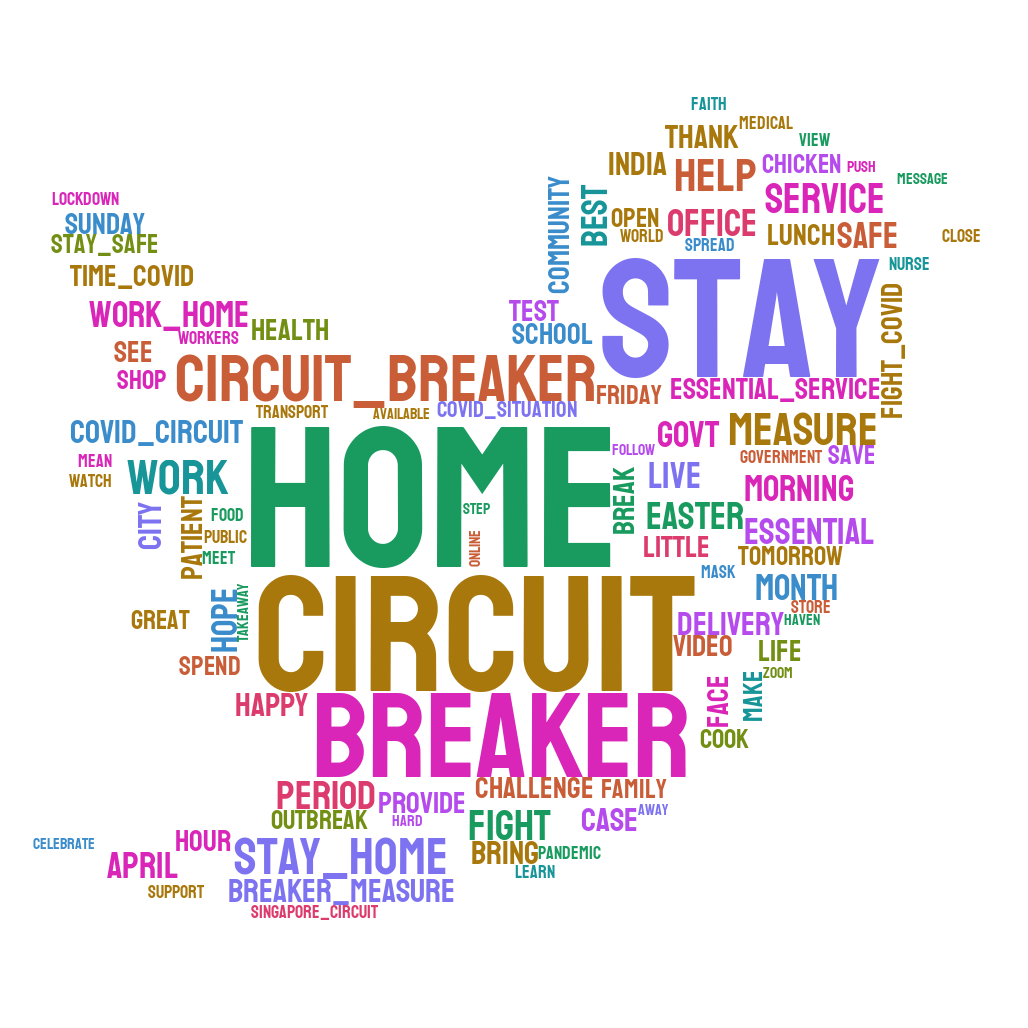

In [40]:
long_string = ','.join(list(tweets[(tweets["ekman_emotion"] == "Joy") & (tweets["week"] == 15)].cleaned_text.values))
stylecloud.gen_stylecloud(text=long_string, icon_name='fab fa-twitter', max_words=100, palette='cmocean.sequential.Phase_11', output_name='twitter-joy-week15.png', size = 1028, collocations=False)
Image.open('twitter-joy-week15.png')